<a href="https://colab.research.google.com/github/Erasnilson/analise-fraude/blob/main/Analise_Fraude_Essemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise de detecção de fraude em cartão de crédito

No trabalho a seguir, utilizaremos um conjunto de dados disponível no Kaggle para exemplificar as técnicas de classificação aplicadas à análise de fraudes em cartões de crédito.(https://www.kaggle.com/code/renjithmadhavan/credit-card-fraud-detection-using-python/input)

Para tal, empregaremos diversos métodos de classificação, incluindo Árvore de Decisão, Multilayer Perceptron (MLP) e K-Nearest Neighbors (K-NN). Além disso, exploraremos técnicas de Ensemble, como os métodos Bagging e Boosting.

O Bagging, ou Bootstrap Aggregating, é uma técnica de Ensemble que visa reduzir a variância e, consequentemente, evitar o overfitting. Nesta abordagem, múltiplas instâncias do mesmo algoritmo são treinadas paralelamente em subconjuntos aleatórios e independentes dos dados de treinamento. Esses subconjuntos são gerados por meio de amostragem com reposição, o que permite que um mesmo dado possa aparecer em vários subconjuntos.

No Boosting, múltiplos modelos são treinados sequencialmente, com cada novo modelo corrigindo os erros dos modelos anteriores. Em vez de treinar os modelos em subconjuntos independentes dos dados, o Boosting ajusta o foco para os dados que foram mal classificados anteriormente.

## Técnicas implementadas
- Decision Tree
- Multilayer Perceptron
- k Nearest Neighbors
- Ensemble (Voting)
- Ensemble (Bagging)
- Random Forest

In [2]:
import numpy as np
import pandas as pd               # manipulação de data frames no python
import matplotlib.pyplot as plt   # plots/gráficos
import seaborn as sns
sns.set()
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [5]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 97% 64.0M/66.0M [00:00<00:00, 143MB/s]
100% 66.0M/66.0M [00:00<00:00, 129MB/s]


In [6]:
import zipfile

# Define the path to your zip file
file_path = '/content/creditcardfraud.zip'  # Replace 'your_file.zip' with your file's name


In [7]:
# Unzip the file to a specific destination
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content')  # Replace 'destination_folder' with your desired folder

In [8]:
df = pd.read_csv('/content/creditcard.csv')
print(df.shape)
df.head()


(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Síntes dos dados



In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### A variável 'class' denota o presença e ausência de fraude no banco de dados. A partir na estimatíva média, nota-se que a proporção de fraude no conjunto de dados é inferior a 1%.


In [11]:
# A variável class denota o presença e ausência de fraude
class_names = {0:'Not Fraud', 1:'Fraud'}
print(df.Class.value_counts().rename(index = class_names))

Class
Not Fraud    284315
Fraud           492
Name: count, dtype: int64


## Modelagem de Classificação
Amostragem do conjunto de dados em:
- 70% Treino
- 30% Teste

In [12]:
# import dos datasets ja existentes no scikit-learn (iris)
from sklearn import datasets

# import das classes dos algoritmos de classificação
from sklearn.tree import DecisionTreeClassifier     # Arvore de decisao
from sklearn.neural_network import MLPClassifier    # MLP
from sklearn.neighbors import KNeighborsClassifier  # k-NN

# import das classes dos algoritmos de ensemble
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, RandomForestClassifier

# import das metodologias de experientação
from sklearn.model_selection import train_test_split # holdout
from sklearn.metrics import accuracy_score           # acurácia

In [13]:
feature_names = df.iloc[:, 1:30].columns
target = df.iloc[:1, 30: ].columns
print(feature_names) # Coveriáveis X
print(target) # Va Resposta Y

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Index(['Class'], dtype='object')


In [14]:
data_features = df[feature_names]
data_target = df[target]

In [15]:
# seed para reprodução dos experimentos
seed = 10

In [16]:
# Separar os conjuntos de treino e teste
# - usaremos holdout
# - 2/3 dos exemplos compõem o conjunto de treinamento
# - 1/3 dos exemplos compõem o conjunto de teste
# a amostragem é estratificada (stratify)

[X_train, X_test, y_train, y_test] = train_test_split(data_features, data_target, test_size=0.30, stratify=data_target, random_state=seed)
print("*** Dimensões dos conjuntos de dados ***")
print("- (X_train) Conjunto de treinamento:\t\t", X_train.shape)
print("- (y_train) Rótulos do conjunto de treinamento:\t", y_train.shape)
print("- (X_test) Conjunto de teste:\t\t\t", X_test.shape)
print("- (y_test) Rótulos do conjunto de teste:\t",y_test.shape)

*** Dimensões dos conjuntos de dados ***
- (X_train) Conjunto de treinamento:		 (199364, 29)
- (y_train) Rótulos do conjunto de treinamento:	 (199364, 1)
- (X_test) Conjunto de teste:			 (85443, 29)
- (y_test) Rótulos do conjunto de teste:	 (85443, 1)


In [17]:
# Função para plotar a superfície de decisão de um classificador
# O código é baseado de:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html

def plot_decision_boundary(classifier, X, y, title):
  xmin, xmax = np.min(X[:, 0]) - 0.05, np.max(X[:, 0]) + 0.05
  ymin, ymax = np.min(X[:, 1]) - 0.05, np.max(X[:, 1]) + 0.05
  step = 0.01

  xx, yy = np.meshgrid(np.arange(xmin, xmax, step), np.arange(ymin, ymax, step))

  Z = classifier.predict(np.hstack((xx.ravel()[:, np.newaxis], yy.ravel()[:, np.newaxis])))
  Z = Z.reshape(xx.shape)

  #colormap = plt.cm.Paired
  colormap = plt.cm.Set1
  plt.contourf(xx, yy, Z, cmap=colormap)

  #color_map_samples = {0: (0, 0, .9), 1: (1, 0, 0), 2: (.8, .6, 0)}
  color_map_samples = {0: (1, 0, 0), 1: (.9, 0, .9), 2: (.8, .8, .8)}
  colors = [color_map_samples[c] for c in y]
  plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors='black')

  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)

  plt.title(title)

In [18]:
# Convertendo os conjuntos de dados do formato do pandas para numpy array (facilitar os plots)
y_train_values = y_train.values.ravel().astype(int)
x_train_values = X_train.values

In [19]:
# Induzindo uma Árvore de Decisão (Decision Tree)
tree = DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=3, random_state=seed)
tree.fit(X_train, y_train_values)

# Induzindo uma Árvore uma MLP (Multilayer Perceptron)
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10000, random_state=seed)
mlp.fit(X_train, y_train_values)

# Induzindo um kNN (k Nearest Neighbors)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train_values)

# Induzindo um ensemble (Voting) composto pelos três modelos induzidos acima
voting_clf = VotingClassifier(estimators=[('Tree', tree), ('MLP', mlp), ('kNN', knn)], voting='hard')
voting_clf.fit(X_train, y_train_values)

VotingClassifier(estimators=[('Tree',
                              DecisionTreeClassifier(min_samples_leaf=3,
                                                     min_samples_split=5,
                                                     random_state=10)),
                             ('MLP',
                              MLPClassifier(hidden_layer_sizes=(10,),
                                            max_iter=10000, random_state=10)),
                             ('kNN', KNeighborsClassifier(n_neighbors=3))])

In [20]:
# Induzindo um ensemble (Bagging)
bagging_clf = BaggingClassifier(estimator=tree, n_estimators=50, random_state=seed)
bagging_clf.fit(x_train_values, y_train_values)

BaggingClassifier(estimator=DecisionTreeClassifier(min_samples_leaf=3,
                                                   min_samples_split=5,
                                                   random_state=10),
                  n_estimators=50, random_state=10)

In [21]:
# Induzindo um ensemble (Boosting)
boosting_clf = AdaBoostClassifier(n_estimators=50,random_state=seed)
boosting_clf.fit(x_train_values, y_train_values)

AdaBoostClassifier(random_state=10)

In [22]:
# Induzindo um ensemble (Random Forest)
random_forest_clf = RandomForestClassifier(n_estimators=50, random_state=seed)
random_forest_clf.fit(x_train_values, y_train_values)

RandomForestClassifier(n_estimators=50, random_state=10)

# Resultados

In [33]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

# Obtendo as predições da DT para o conjunto de teste e mensurando a acurácia

tree_y_test_pred = tree.predict(X_test)
tree_acc = round(accuracy_score(y_test.values, tree_y_test_pred), 4)
tree_precision = round(precision_score(y_test.values, tree_y_test_pred), 4)
tree_recall_score = round(recall_score(y_test.values, tree_y_test_pred), 4)
tree_f1_score = round(f1_score(y_test.values, tree_y_test_pred), 4)

# .. o mesmo para MLP
y_test_pred_mlp = mlp.predict(X_test)
mlp_acc = round(accuracy_score(y_test.values, y_test_pred_mlp), 4)
mlp_precision = round(precision_score(y_test.values, y_test_pred_mlp), 4)
mlp_recall_score = round(recall_score(y_test.values, y_test_pred_mlp), 4)
mlp_f1_score = round(f1_score(y_test.values, y_test_pred_mlp), 4)


# .. o mesmo para kNN
y_test_pred_knn = knn.predict(X_test)
knn_acc = round(accuracy_score(y_test.values, y_test_pred_knn), 4)
knn_precision = round(precision_score(y_test.values, y_test_pred_knn), 4)
knn_recall_score = round(recall_score(y_test.values, y_test_pred_knn), 4)
knn_f1_score = round(f1_score(y_test.values, y_test_pred_knn), 4)

# .. o mesmo para Voting
y_test_pred_voting = voting_clf.predict(X_test)
voting_acc = round(accuracy_score(y_test.values, y_test_pred_voting), 4)
voting_precision = round(precision_score(y_test.values, y_test_pred_voting), 4)
voting_recall_score = round(recall_score(y_test.values, y_test_pred_voting), 4)
voting_f1_score = round(f1_score(y_test.values, y_test_pred_voting), 4)


# .. o mesmo para Bagging
y_test_pred_bagging = bagging_clf.predict(X_test)
bagging_acc = round(accuracy_score(y_test.values, y_test_pred_bagging), 4)
bagging_precision = round(precision_score(y_test.values, y_test_pred_bagging), 4)
bagging_recall_score = round(recall_score(y_test.values, y_test_pred_bagging), 4)
bagging_f1_score = round(f1_score(y_test.values, y_test_pred_bagging), 4)

# .. o mesmo para Boosting
y_test_pred_boosting = boosting_clf.predict(X_test)
boosting_acc = round(accuracy_score(y_test.values, y_test_pred_boosting), 4)
boosting_precision = round(precision_score(y_test.values, y_test_pred_boosting), 4)
boosting_recall_score = round(recall_score(y_test.values, y_test_pred_boosting), 4)
boosting_f1_score = round(f1_score(y_test.values, y_test_pred_boosting), 4)


# .. o mesmo para Random Forest
y_test_pred_rf = random_forest_clf.predict(X_test)
rf_acc = round(accuracy_score(y_test.values, y_test_pred_rf), 4)
rf_precision = round(precision_score(y_test.values, y_test_pred_rf), 4)
rf_recall_score = round(recall_score(y_test.values, y_test_pred_rf), 4)
rf_f1_score = round(f1_score(y_test.values, y_test_pred_rf), 4)



print("*** Desempenho dos algoritmos *** ")

print("Accuracy for tree Model : {tree_acc}".format(tree_acc  = tree_acc ))
print("Precision for tree Model : {tree_precision}".format(tree_precision  = tree_precision ))
print("Sensitivity/Recall for tree Model : {tree_recall_score}".format(tree_recall_score  = tree_recall_score ))
print("F1 Score for tree Model : {tree_f1_score}".format(tree_f1_score = tree_f1_score))

print("Accuracy for MLP Model : {mlp_acc}".format(mlp_acc  = mlp_acc ))
print("Precision for MLP Model : {mlp_precision}".format(mlp_precision  = mlp_precision ))
print("Sensitivity/Recall for MLP Model : {mlp_recall_score}".format(mlp_recall_score  = mlp_recall_score ))
print("F1 Score for MLP Model : {mlp_f1_score}".format(mlp_f1_score = mlp_f1_score))

print("Accuracy for KNN Model : {knn_acc}".format(knn_acc  = knn_acc))
print("Precision for KNN Model : {knn_precision}".format(knn_precision  = knn_precision ))
print("Sensitivity/Recall for KNN Model : {knn_recall_score}".format(knn_recall_score  = knn_recall_score ))
print("F1 Score for KNN Model : {knn_f1_score}".format(knn_f1_score = knn_f1_score))

print("Accuracy for Voting Model : {voting_acc}".format(voting_acc  = voting_acc ))
print("Precision for Voting Model : {voting_precision}".format(voting_precision  = voting_precision ))
print("Sensitivity/Recall for Voting Model : {voting_recall_score}".format(voting_recall_score  = voting_recall_score ))
print("F1 Score for Voting Model : {voting_f1_score}".format(voting_f1_score = voting_f1_score))

print("Accuracy for Bagging Model : {bagging_acc}".format(bagging_acc  = bagging_acc ))
print("Precision for Bagging Model : {bagging_precision}".format(bagging_precision  = bagging_precision ))
print("Sensitivity/Recall for Bagging Model : {bagging_recall_score}".format(bagging_recall_score  = bagging_recall_score ))
print("F1 Score for Bagging Model : {bagging_f1_score}".format(bagging_f1_score = bagging_f1_score))

print("Accuracy for Boosting Model : {boosting_acc}".format(boosting_acc  = boosting_acc ))
print("Precision for Boosting Model : {boosting_precision}".format(boosting_precision  = boosting_precision ))
print("Sensitivity/Recall for Boosting Model : {boosting_recall_score}".format(boosting_recall_score  = boosting_recall_score ))
print("F1 Score for Boosting Model : {boosting_f1_score}".format(boosting_f1_score = boosting_f1_score))

print("Accuracy for RF Model : {rf_acc}".format(rf_acc  = rf_acc ))
print("Precision for RF Model : {rf_precision}".format(rf_precision  = rf_precision ))
print("Sensitivity/Recall for RF Model : {rf_recall_score}".format(rf_recall_score  = rf_recall_score ))
print("F1 Score for RF Model : {rf_f1_score}".format(rf_f1_score = rf_f1_score))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


*** Desempenho dos algoritmos *** 
Accuracy for tree Model : 0.9993
Precision for tree Model : 0.8678
Sensitivity/Recall for tree Model : 0.7095
F1 Score for tree Model : 0.7807
Accuracy for MLP Model : 0.9994
Precision for MLP Model : 0.8722
Sensitivity/Recall for MLP Model : 0.7838
F1 Score for MLP Model : 0.8256
Accuracy for KNN Model : 0.9993
Precision for KNN Model : 0.9245
Sensitivity/Recall for KNN Model : 0.6622
F1 Score for KNN Model : 0.7717
Accuracy for Voting Model : 0.9994
Precision for Voting Model : 0.916
Sensitivity/Recall for Voting Model : 0.7365
F1 Score for Voting Model : 0.8165
Accuracy for Bagging Model : 0.9995
Precision for Bagging Model : 0.9286
Sensitivity/Recall for Bagging Model : 0.7905
F1 Score for Bagging Model : 0.854
Accuracy for Boosting Model : 0.9992
Precision for Boosting Model : 0.8226
Sensitivity/Recall for Boosting Model : 0.6892
F1 Score for Boosting Model : 0.75
Accuracy for RF Model : 0.9995
Precision for RF Model : 0.9262
Sensitivity/Recall f

##  Avaliando o desempenho do algoritmo Bagging
- O Bagging (Bootstrap Aggregating) é um método de ensemble que visa melhorar a performance de algoritmos de aprendizado de máquina, principalmente modelos de previsão. Ele funciona treinando múltiplos modelos **em subconjuntos aleatórios do conjunto de dados** e combinando suas previsões para obter uma previsão final mais robusta. Aqui está uma visão geral de como o Bagging funciona:

- Treinamento de Modelos: o mesmo algoritmo é treinado em diferentes subconjuntos, o que pode ajudar a reduzir a variância e melhorar a generalização.

- Combinação das Previsões: para tarefas de classificação, a previsão final é feita por votação majoritária (a classe mais frequente entre as previsões dos modelos). Para tarefas de regressão, a previsão final é a média das previsões dos modelos individuais.

# Vantagens do Bagging:

-Redução da Variância: Como o Bagging treina vários modelos em subconjuntos diferentes, ele reduz a variância dos modelos individuais e melhora a estabilidade.

-Melhoria na Generalização: Ao combinar múltiplos modelos, o Bagging tende a melhorar a performance geral e reduzir o risco de overfitting.

-Robustez: É menos sensível a flutuações nos dados de treinamento, tornando o modelo mais robusto.

# Hiperparâmetros utilizados

(DecisionTreeClassifier(min_samples_leaf=3, min_samples_split=5, random_state=10)

- min_samples_leaf=3 -> cada folha da árvore deve ter pelo menos 3 amostras.
- min_samples_split=5 -> um nó só será dividido se contiver pelo menos 5 amostras.
- random_state=10 -> define uma semente específica para o gerador de números aleatórios

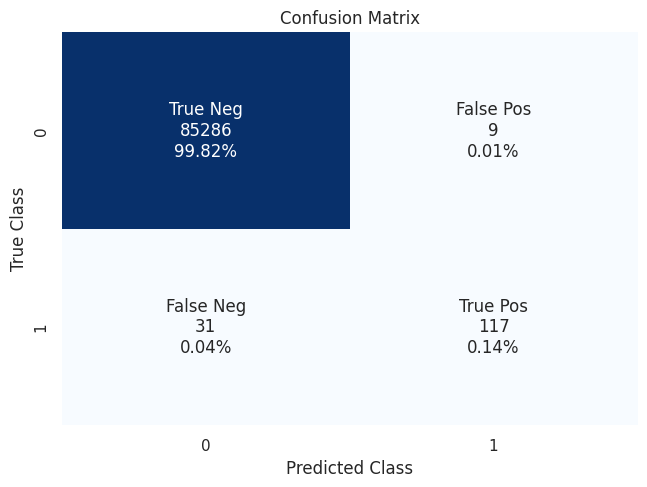

In [32]:
from sklearn.metrics import confusion_matrix
#Baggin com metodo tree

#class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(y_test.values, y_test_pred_bagging)


group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create heatmap
sns.heatmap(matrix,cbar=None, annot=labels, fmt='', cmap='Blues')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

## Acurácia

A Acurácia é uma métrica que indica a proporção de previsões corretas feitas pelo modelo em relação ao total de previsões

\begin{equation}
\text{Acurácia} = \frac{\text{Número de Previsões Corretas}}{\text{Número Total de Previsões}}
\end{equation}



## Sensibilidade

 A sensibilidade do modelo, também conhecida como taxa de verdadeiro positivo (True Positive Rate), é uma métrica utilizada em modelos de classificação para avaliar o desempenho do modelo. Esta métrica indica a capacidade do modelo de identificar corretamente as ocorrências de uma classe positiva (por exemplo, casos de uma doença, fraudes, etc.).

\begin{equation}
\text{Sensibilidade} = \frac{\text{Verdadeiros Positivos (TP)}}{\text{Verdadeiros Positivos (TP)} + \text{Falsos Negativos (FN)}}
\end{equation}

- Verdadeiros Positivos (TP): Casos onde o modelo previu corretamente a classe positiva.

- Falsos Negativos (FN): Casos onde o modelo previu incorretamente a classe negativa, ou seja, deixou de identificar uma ocorrência positiva.





## Precisão

A precisão do modelo é particularmente importante em aplicações onde os falsos positivos têm um custo elevado, como na detecção de fraudes, diagnósticos médicos ou filtros de spam. No entanto, aumentar a precisão pode diminuir a sensibilidade e vice-versa.

\begin{equation}
\text{Precisão} = \frac{\text{Verdadeiros Positivos (TP)}}{\text{Verdadeiros Positivos (TP)} + \text{Falsos Positivos (FP)}}
\end{equation}

- Verdadeiros Positivos (TP): Casos onde o modelo previu corretamente a classe positiva.

- Falsos Positivos (FP): Casos onde o modelo previu a classe positiva incorretamente (ou seja, a previsão foi positiva, mas a instância era realmente negativa).

## F1 Score

O F1 Score é a média harmônica entre a precisão e a sensibilidade, é utilizada onde há um desequilíbrio de classes, ou seja, quando uma classe é muito mais frequente do que outra. Assim,  **para valores próximo a 1**, tem-se o melhor desempenho possível.

\begin{equation}
F1 = 2 \cdot \frac{\text{Precisão} \cdot \text{Sensibilidade}}{\text{Precisão} + \text{Sensibilidade}}
\end{equation}

